<a href="https://colab.research.google.com/github/AyuBuradkar26/LGMVIP-DataScience/blob/main/task_1_Iris_Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Description**

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Setosa
      -- Versicolour
      -- Virginica

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [19]:
# Loading iris dataset in DS
DS= sns.load_dataset('iris')
print(DS)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [20]:
# How many features are there and what are their types (e.g., numeric, nominal)? 
DS.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
DS.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
DS.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [16]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
DS.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
DS.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [22]:
DS.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

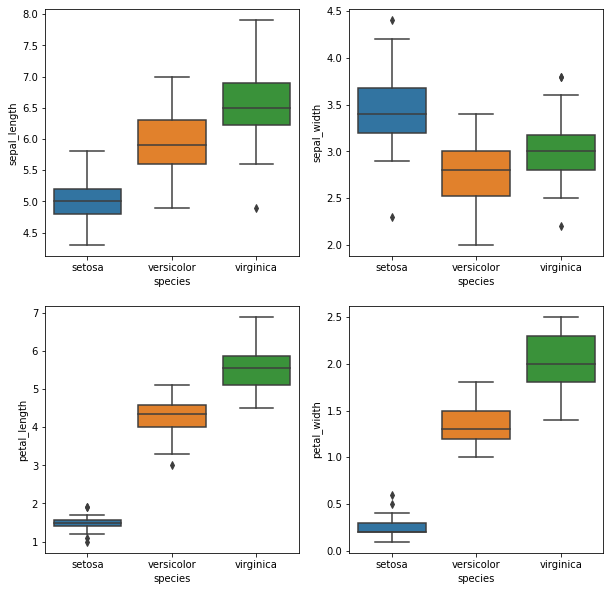

In [55]:
# Illustrate the feature distributions:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(y='sepal_length',x='species',data=DS,ax=axs[0, 0])
sns.boxplot(y='sepal_width',x='species',data=DS,ax=axs[0, 1])
sns.boxplot(y='petal_length',x='species',data=DS,ax=axs[1, 0])
sns.boxplot(y='petal_width',x='species',data=DS,ax=axs[1,1])
plt.show()

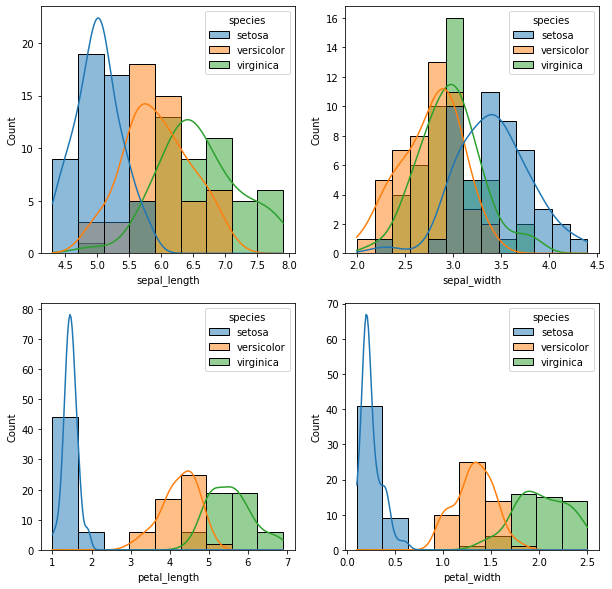

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=DS, x="sepal_length", kde=True, ax=axs[0, 0],hue='species')
sns.histplot(data=DS, x="sepal_width", kde=True, ax=axs[0, 1],hue='species')
sns.histplot(data=DS, x="petal_length", kde=True, ax=axs[1, 0],hue='species')
sns.histplot(data=DS, x="petal_width", kde=True,  ax=axs[1, 1],hue='species')

plt.show()

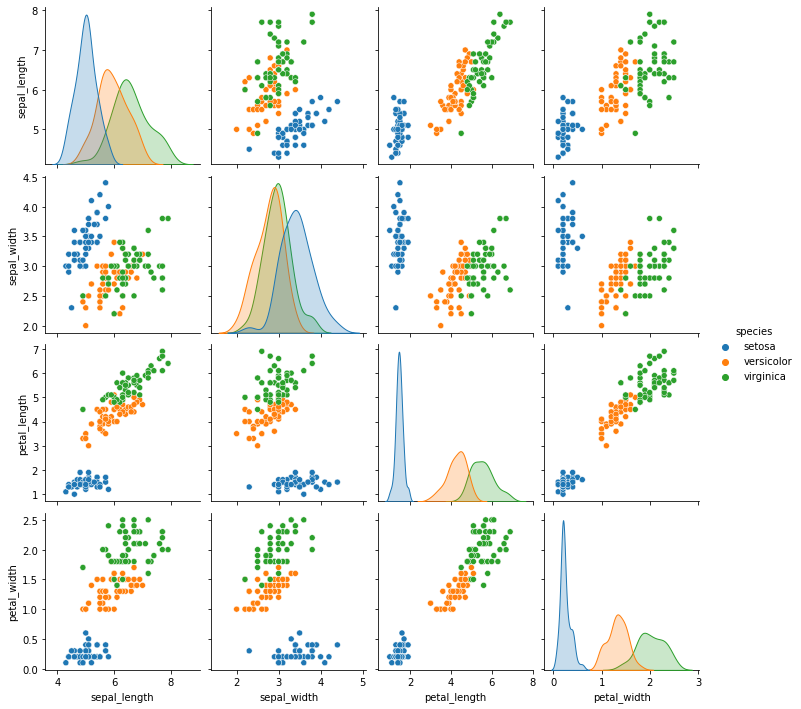

In [58]:
# Visualize the whole dataset
sns.pairplot(DS, hue='species')

In [107]:
#Co-relation
DS1=DS.drop('species',axis=1)
CR=DS1.corr()
CR

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Model Training

In [72]:
# Mapping species
species = {
    "species" : {"setosa":0,"versicolor":1,"virginica":2}
}
DS.replace(species,inplace=True)
DS

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [73]:
# Separate features and target  
data = DS.values
X = data[:,0:4]
y = data[:,4]
print("Xshape=",X.shape ,"Yshape=",y.shape)
print(X[:10, :])
print('-'*20)
print(y[:10])

Xshape= (150, 4) Yshape= (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
--------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [80]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
print(X_train.shape,X_test.shape)
print(X_train[:5])
print('-'*15)
print(y_train[:5])
print('-'*15)
print(X_test[:5])
print('-'*15)
print(y_test[:5])

(112, 4) (38, 4)
[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]]
---------------
[1. 1. 2. 0. 2.]
---------------
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
---------------
[2. 1. 0. 2. 0.]


In [81]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train[:5])
print('-'*15)
print(X_test[:5])

[[ 0.01543995 -0.11925475  0.22512685  0.35579762]
 [-0.09984503 -1.04039491  0.11355956 -0.02984109]
 [ 1.05300481 -0.11925475  0.95031423  1.12707506]
 [-1.36797986  0.34131533 -1.39259884 -1.31530348]
 [ 1.1682898   0.11103029  0.72717965  1.38416753]]
---------------
[[-0.09984503 -0.57982483  0.72717965  1.51271377]
 [ 0.13072494 -1.96153508  0.11355956 -0.28693357]
 [-0.44569998  2.64416573 -1.33681519 -1.31530348]
 [ 1.62942973 -0.34953979  1.39658338  0.74143634]
 [-1.0221249   0.80188541 -1.28103155 -1.31530348]]


In [83]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(y_pred[:20])
print(y_test[:20])

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0.]


In [90]:
# Model Evaluation:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


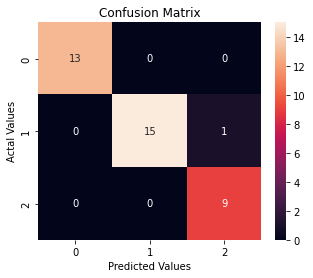

In [91]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [92]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9736842105263158


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      0.94      0.97        16
         2.0       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [98]:
# Testing the model:
X_new= np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input
prediction = classifier.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [1. 2. 2.]


**Conclusion**

1.PetalWidthCm was highly correlated with PetalLengthCm and vice versa

2.There were no null values in the dataset

3.The dataset was distributed equally

4.Accuracy score was very high for logistic regression model